In [20]:
import spacy
import seaborn
import numpy as np
import pandas as pd
from sklearn import svm, naive_bayes
import matplotlib.pyplot as plt
from spacy.matcher import Matcher
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import accuracy_score as accuracy, confusion_matrix

In [10]:
df = pd.read_json("train.jsonl", lines=True)
ytrain = df.label
df

,id,verifiable,label,claim,evidence
0,75397,VERIFIABLE,SUPPORTS,Nikolaj Coster-Waldau worked with the Fox Broa...,"[[[92206, 104971, Nikolaj_Coster-Waldau, 7], [..."
1,150448,VERIFIABLE,SUPPORTS,Roman Atwood is a content creator.,"[[[174271, 187498, Roman_Atwood, 1]], [[174271..."
2,214861,VERIFIABLE,SUPPORTS,"History of art includes architecture, dance, s...","[[[255136, 254645, History_of_art, 2]]]"
3,156709,VERIFIABLE,REFUTES,Adrienne Bailon is an accountant.,"[[[180804, 193183, Adrienne_Bailon, 0]]]"
4,83235,NOT VERIFIABLE,NOT ENOUGH INFO,System of a Down briefly disbanded in limbo.,"[[[100277, None, None, None]]]"
...,...,...,...,...,...
145444,75062,VERIFIABLE,REFUTES,Led Zeppelin released an eponymous debut album...,"[[[91851, 104659, Led_Zeppelin, 6], [91851, 10..."
145445,149256,VERIFIABLE,SUPPORTS,Taal was romantic.,"[[[292586, 285327, Taal_-LRB-film-RRB-, 0]], [..."
145446,13287,VERIFIABLE,SUPPORTS,Her stars American actress Rooney Mara.,"[[[28520, 34848, Her_-LRB-film-RRB-, 3], [2852..."
145447,13114,VERIFIABLE,SUPPORTS,J. R. R. Tolkien created Gimli.,"[[[28359, 34669, Gimli_-LRB-Middle-earth-RRB-,..."


In [18]:
labels = df.label.unique()

In [3]:
q = df.claim.tolist()
vect = CountVectorizer()
vec = vect.fit_transform(q)
vec

<145449x21483 sparse matrix of type '<class 'numpy.int64'>'
	with 1098420 stored elements in Compressed Sparse Row format>

In [9]:
test = pd.read_json("shared_task_dev.jsonl", lines=True)
ytest = test.label
test

,id,verifiable,label,claim,evidence
0,91198,NOT VERIFIABLE,NOT ENOUGH INFO,Colin Kaepernick became a starting quarterback...,"[[[108548, None, None, None]]]"
1,194462,NOT VERIFIABLE,NOT ENOUGH INFO,Tilda Swinton is a vegan.,"[[[227768, None, None, None]]]"
2,137334,VERIFIABLE,SUPPORTS,Fox 2000 Pictures released the film Soul Food.,"[[[289914, 283015, Soul_Food_-LRB-film-RRB-, 0..."
3,166626,NOT VERIFIABLE,NOT ENOUGH INFO,Anne Rice was born in New Jersey.,"[[[191656, None, None, None], [191657, None, N..."
4,111897,VERIFIABLE,REFUTES,Telemundo is a English-language television net...,"[[[131371, 146144, Telemundo, 0]], [[131371, 1..."
...,...,...,...,...,...
19993,8538,VERIFIABLE,REFUTES,Hermit crabs are arachnids.,"[[[15450, 19262, Hermit_crab, 0], [15450, 1926..."
19994,145641,VERIFIABLE,REFUTES,Michael Hutchence died on a boat.,"[[[168967, 182663, Michael_Hutchence, 15]]]"
19995,87517,VERIFIABLE,SUPPORTS,The Cyclades are located to the southeast of G...,"[[[104709, 118125, Cyclades, 0]]]"
19996,111816,NOT VERIFIABLE,NOT ENOUGH INFO,Theresa May worked the docks.,"[[[131223, None, None, None]]]"


In [6]:
p = test.claim.tolist()
t = vect.transform(p)
t

<19998x21483 sparse matrix of type '<class 'numpy.int64'>'
	with 142379 stored elements in Compressed Sparse Row format>

In [12]:
def get_predictions(model, xtest, ytest, log_string):
    print(f"Performance for {log_string}:")
    y_pred = model.predict(xtest)
    
    acc = accuracy(ytest, y_pred)
    
    print(f"Accuracy: {acc}")
    
    cm = confusion_matrix(ytest, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    seaborn.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Reds')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix')
    
    plt.show()

In [22]:
svm_classifier = svm.LinearSVC()

svm_classifier.fit(vec, ytrain)

C:\Users\KZK-Y540\.conda\envs\intro2nlp\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\KZK-Y540\.conda\envs\intro2nlp\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

Performance for SVM.LinearSVC:
Accuracy: 0.49174917491749176


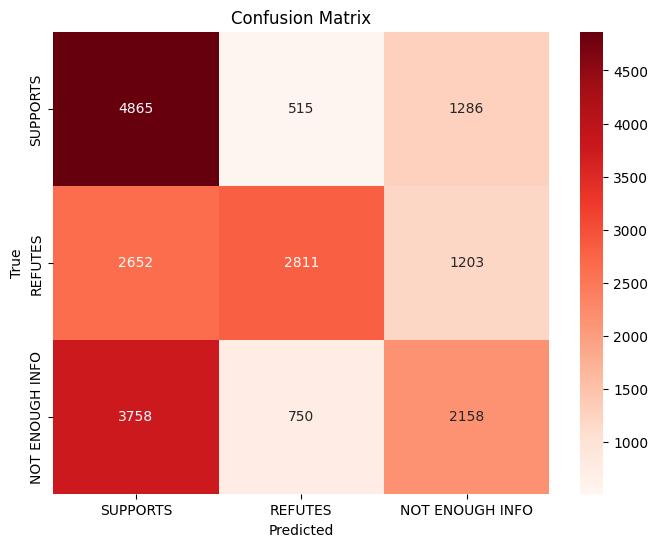

In [23]:
get_predictions(svm_classifier, t, ytest, "SVM.LinearSVC")

Performance for Random Forest Classifier:
Accuracy: 0.49234923492349236


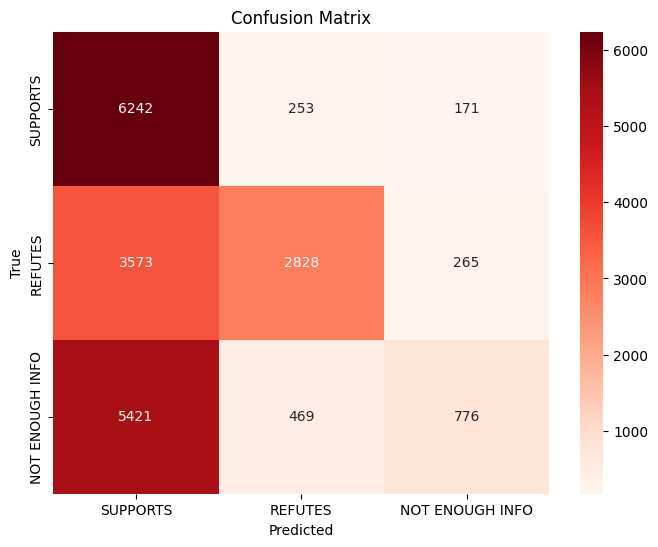

In [28]:
# Random Forest
rf_classifier = rfc(criterion="entropy", random_state=101, n_estimators=50, n_jobs=4)
rf_classifier.fit(vec, ytrain)

get_predictions(rf_classifier, t, ytest, "Random Forest Classifier")

C:\Users\KZK-Y540\.conda\envs\intro2nlp\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Performance for MLP Classifier:
Accuracy: 0.507000700070007


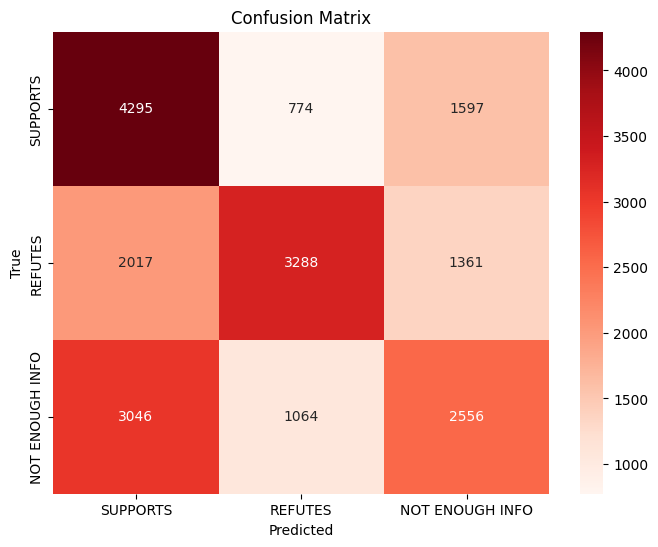

In [25]:
# MLP Classifier
mlp = MLP(random_state=101, activation='relu', hidden_layer_sizes=(40, 40), max_iter=1000)
mlp.fit(vec, ytrain)

get_predictions(mlp, t, ytest, "MLP Classifier")